In [27]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
# Lets load dataset from data/new_york_listings_2024.csv

df = pd.read_csv('../data/new_york_listings_2024.csv')

In [29]:
# Displaying first 5 rows of the dataset
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,rating,bedrooms,beds,baths
0,1312228,Rental unit in Brooklyn · ★5.0 · 1 bedroom,7130382,Walter,Brooklyn,Clinton Hill,40.683710,-73.964610,Private room,55.0,...,2015-12-20,0.03,1,0,0,No License,5.0,1,1,Not specified
1,45277537,Rental unit in New York · ★4.67 · 2 bedrooms ·...,51501835,Jeniffer,Manhattan,Hell's Kitchen,40.766610,-73.988100,Entire home/apt,144.0,...,2023-05-01,0.24,139,364,2,No License,4.67,2,1,1
2,971353993633883038,Rental unit in New York · ★4.17 · 1 bedroom · ...,528871354,Joshua,Manhattan,Chelsea,40.750764,-73.994605,Entire home/apt,187.0,...,2023-12-18,1.67,1,343,6,Exempt,4.17,1,2,1
3,3857863,Rental unit in New York · ★4.64 · 1 bedroom · ...,19902271,John And Catherine,Manhattan,Washington Heights,40.835600,-73.942500,Private room,120.0,...,2023-09-17,1.38,2,363,12,No License,4.64,1,1,1
4,40896611,Condo in New York · ★4.91 · Studio · 1 bed · 1...,61391963,Stay With Vibe,Manhattan,Murray Hill,40.751120,-73.978600,Entire home/apt,85.0,...,2023-12-03,0.24,133,335,3,No License,4.91,Studio,1,1


In [30]:
# Displaying the shape of the dataset

df.shape

(20758, 22)

Here we have 20758 rows and 16 columns in the dataset. Which means there are 20,758 listings in New York City. And 22 means each column represents a different attribute of the listing such as (price, room type, location, etc)

In [31]:
# Checking for missing values
df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
license                           0
rating                            0
bedrooms                          0
beds                              0
baths                             0
dtype: int64

Here we can see that there are no missing values in the dataset. That's a good sign as missing data can significantly impact the accuracy. However, we need to decide how to handle them. For instance, we can either remove rows with df.dropna() or fill them with some value like 0, mean, median.

But we can see bedrooms has studio and N/A values which should be treated as missing values. Let's handle them.

In [32]:
df['bedrooms'] = df['bedrooms'].replace({'Studio': 0, 'N/A': None}) 
df['bedrooms'] = pd.to_numeric(df['bedrooms'])

In [33]:
# Checking the data types of the columns

df.dtypes


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
rating                             object
bedrooms                            int64
beds                                int64
baths                              object
dtype: object

## Key observations:

Categorical columns: neighborhood, neighborhood_group, room_type, license  

Numerical columns: id, host_id, latitude, Longitude, price, minimum_nights,number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365, number_of_reviews_ltm, beds  

Potential investigation required columns:
name, host_name, last_review, rating, bedrooms, baths


In [34]:
# Converting last_review column to datetime format

df['last_review'] = pd.to_datetime(df['last_review'])


# Univariate Analysis


In [36]:
# Also lets import matplotlib for visualization I will add it at top of the code

# Let's add numerical columns into a single variable for easy visualization

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols = numerical_cols.drop(['id', 'host_id', 'latitude', 'longitude'])
df[numerical_cols].describe()




,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,bedrooms,beds
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,187.776616,28.558435,42.642596,1.257910,18.844108,205.990317,10.852105,1.306725,1.723721
std,1022.797208,33.536518,73.561654,1.904661,70.910834,135.087768,21.357071,0.877419,1.212272
min,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000,1.000000
50%,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000,1.000000
75%,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000,2.000000
max,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,15.000000,42.000000


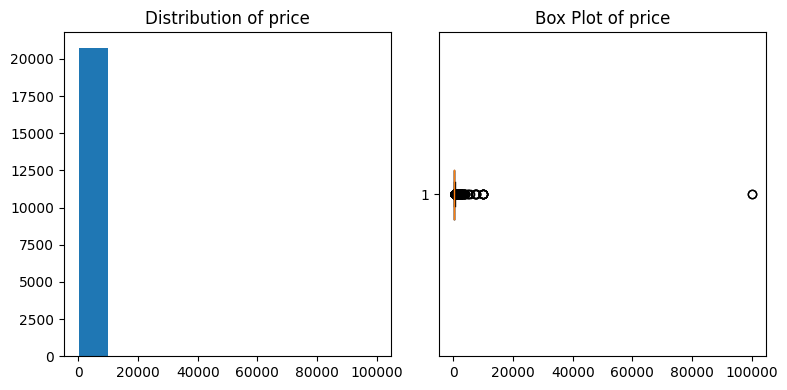

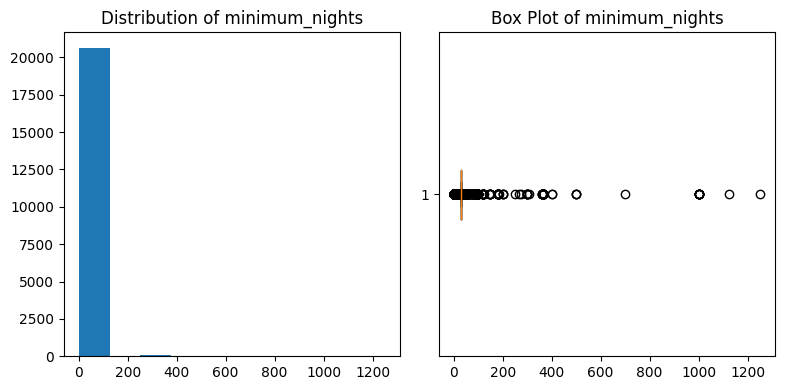

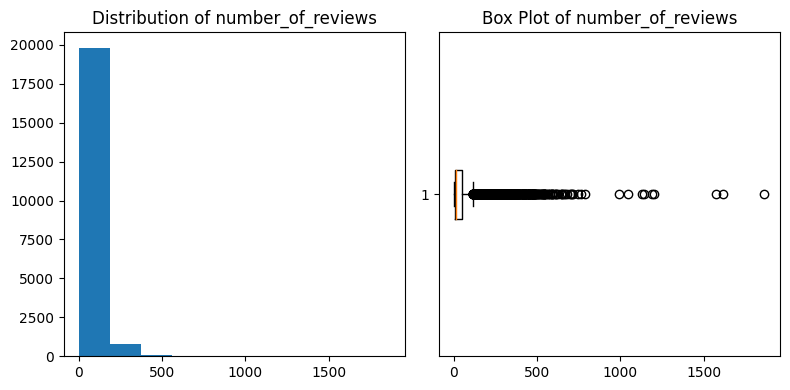

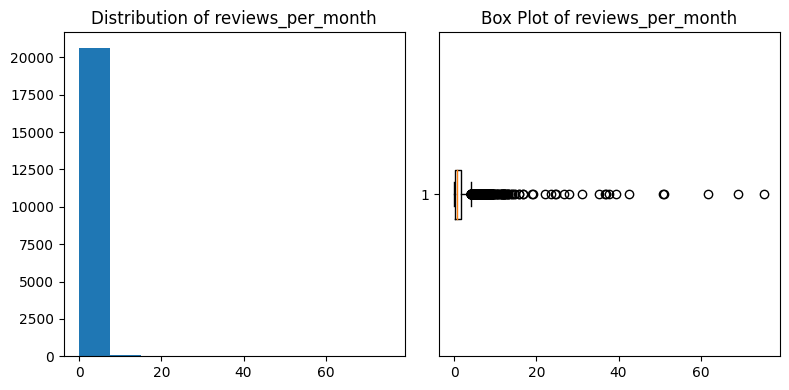

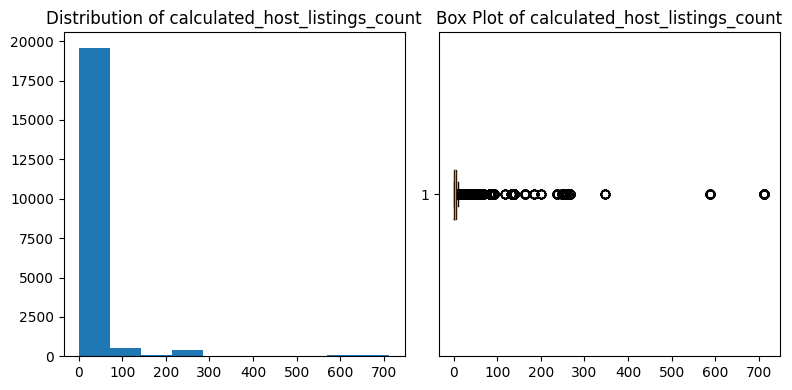

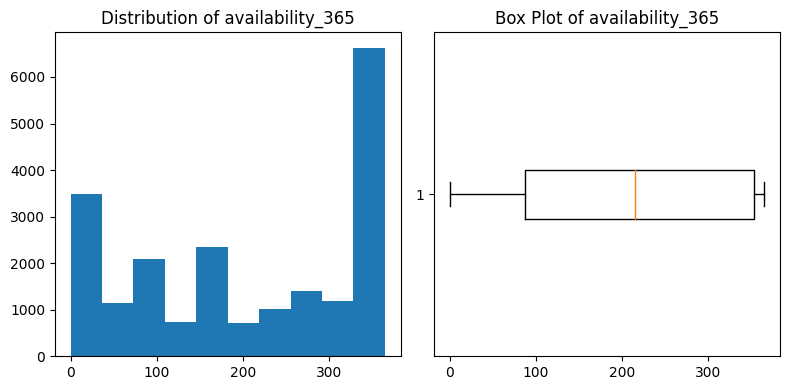

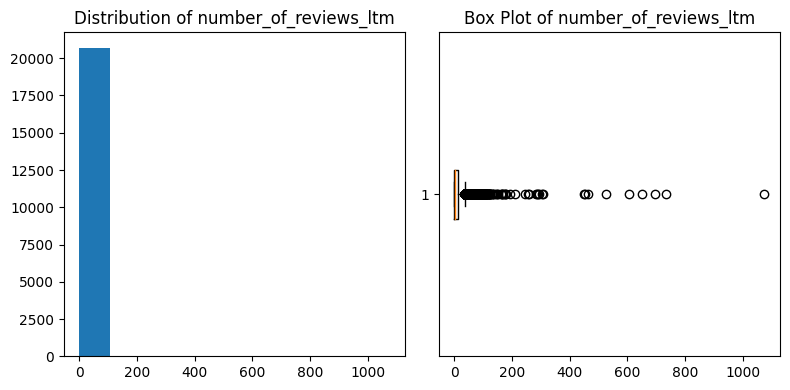

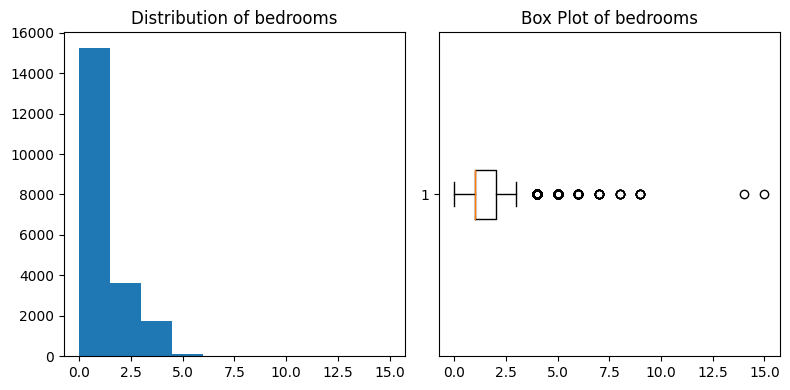

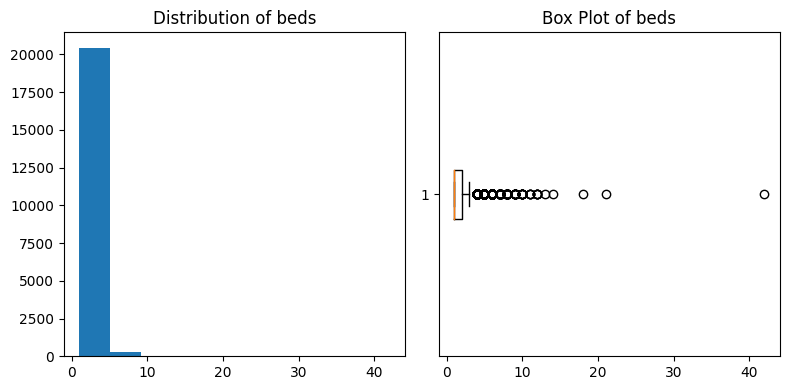

In [37]:
# Visualizations
for col in numerical_cols:
    plt.figure(figsize=(8, 4)) 

    # Histogram
    plt.subplot(1, 2, 1)  
    plt.hist(df[col], bins=10)
    plt.title(f'Distribution of {col}')

    # Box Plot
    plt.subplot(1, 2, 2) 
    plt.boxplot(df[col], vert=False) 
    plt.title(f'Box Plot of {col}')

    plt.tight_layout()
    plt.show()

Here we don't need to see box plots for 'id', 'host_id', 'latitude', 'longitude' as they are just unique identifiers and don't provide any meaningful insights.

# Bivariate Analysis

In this section, we will analyze the relationship between two columns. Where we will use a scatter plot for numerical columns and a bar plot for categorical columns. 

# Data Visualizations

In this we will create meaninful visualizations to gain insights and communicate our findings. 

# Conclusions and Recommendations

In this analysis, we found that the listings in New York City are distributed across various neighborhoods, and they have different room types. 